<div style="text-align: center; font-size: 20px; color: #003366; font-weight: bold; background-color: #e0f7fa; padding: 10px;">
    Predicting Employee Treatment-Seeking Behavior for Mental Health
</div>


![Counselling](counsel.png)

<div style="left-align: center; font-size: 20px; color: #003366; font-weight: bold; background-color: #e0f7fa; padding: 10px;">
    About the Project
</div>

This project utilizes a dataset from a 2014 survey that measures attitudes towards mental health and the frequency of mental health disorders in the tech workplace. We analyze various machine learning models to identify key features influencing employees' decisions to seek treatment.    

We begin by evaluating several machine learning models, including Random Forest, Decision Tree, Support Vector Classification (SVC), Logistic Regression, and XGBoost, using default parameters to assess their initial performance. Subsequently, we optimize these models with GridSearchCV to find the best parameters and re-evaluate their performance. This comprehensive approach aims to uncover key predictors of treatment-seeking behavior and enhance the accuracy of our predictions.


<div style="left-align: center; font-size: 20px; color: #003366; font-weight: bold; background-color: #e0f7fa; padding: 10px;">
    Understanding the Dataset
</div>

- **Timestamp**
- **Age**
- **Gender**
- **Country**
- **state**: Which state in the United states do you live in?
- **self_employed**: Are you self-employed?
- **family_history**: Do you have a family history of mental illness?
- **treatment**: Have you sought treatment for a mental health condition?
- **work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?
- **no_employees**: How many employees does your company have?
- **remote_work**: Do you work remotely at least 50% of the time?
- **tech_company**: Is your employer primarily a tech company/organization?
- **benefits**: Does your employer provide mental health benefits?
- **care_options**: Do you know the options for mental health care your employer provides?
- **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?
- **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- **leave**: How easy is it for you to take medical leave for a mental health condition?
- **mentalhealthconsequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
- **physhealthconsequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?
- **coworkers**: Would you be willing to discuss a mental health issue with your coworkers?
- **physhealthinterview**: Would you bring up a physical health issue with a potential employer in an interview?
- **mentalvsphysical**: Do you feel that your employer takes mental health as seriously as physical health?
- **obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- **comments**: Any additional notes or comments


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

C:\Users\sumai\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("survey.csv")

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
#No. of respondents from each country
df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

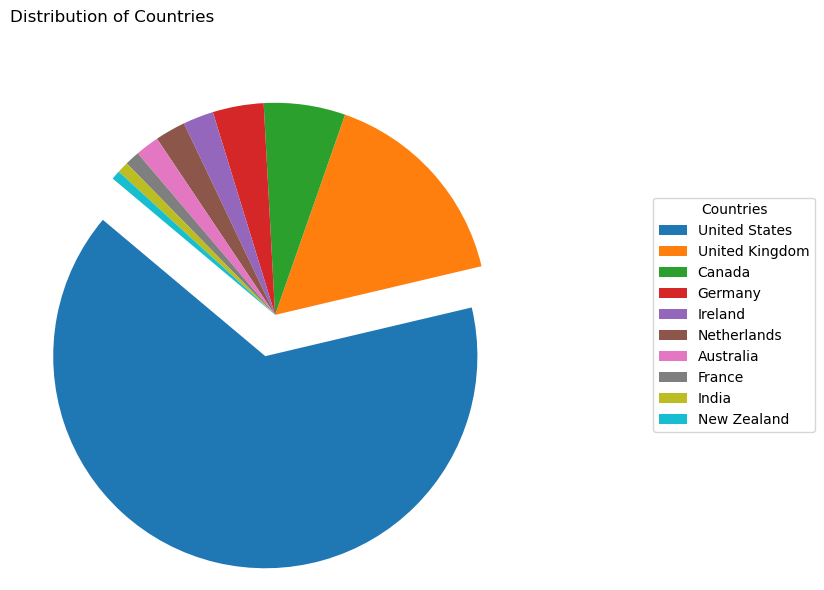

In [128]:
import matplotlib.pyplot as plt

# Data
labels = ['United States', 'United Kingdom', 'Canada', 'Germany', 'Ireland', 'Netherlands', 
          'Australia', 'France', 'India', 'New Zealand']
sizes = [751, 185, 72, 45, 27, 27, 21, 13, 10, 8]

# Explode the slice for 'United States'
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Only 'United States' slice is pulled out

# Create the pie chart
plt.figure(figsize=(10, 6))

# Plot pie chart
plt.pie(sizes, startangle=140, explode=explode, labels=None, autopct=None, pctdistance=0.85)

# Add a left-aligned title
plt.title('Distribution of Countries', loc='left', pad=20)

# Add a legend slightly to the right
plt.legend(labels, loc='center left', bbox_to_anchor=(1.2, 0.5), title='Countries')  # Adjust x value in bbox_to_anchor

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the chart
plt.show()


In [7]:
#Check percentage of missing values in each column
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

<div style="left-align: center; font-size: 20px; color: #003366; font-weight: bold; background-color: #e0f7fa; padding: 10px;">
    Data Preprocessing
</div>

<div style="left-align: center; font-size: 15px; color: #003366; font-weight: bold; background-color: #f0f0f0; padding: 10px;">
    Feature Elimination
</div>

The dataset includes various countries, with the United States contributing 60% of the data. This dominance could cause the model to overemphasize the Country variable, potentially skewing the training process. To address this, the *Country* column will be removed from the dataset.  

The *comments* and *state* columns have 86% and 40% null values, respectively, which is significant. Therefore, these columns will be dropped. 

Additionally, the *Timestamp* column will be removed as it is irrelevant to our case study.

In [8]:
df.drop(columns=['state','comments','Timestamp', 'Country'], inplace=True)

In [9]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

<div style="left-align: center; font-size: 15px; color: #003366; font-weight: bold; background-color: #f0f0f0; padding: 10px;">
    Data Sanitation
</div>

Values below 0 and above 100 will be removed as negative ages and the value above 100 are incorrect.

In [10]:
df.drop(df[(df['Age'] < 0) | (df['Age'] > 100)].index, inplace=True)

In [11]:
#Fill null values with the highest occuring value
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

In [12]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )

In [13]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [14]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [15]:
# Dictionary with lists of inconsistent values mapped to a single category
gender_map = {
    'Male': ['Male', 'M', 'male', 'Cis Male', 'Male (CIS)', 'Man', 'Male ', 'Cis Man', 
             'msle', 'Mal', 'maile', 'Make', 'Malr', 'Mail', 'something kinda male?', 
             'Guy (-ish) ^_^', 'male leaning androgynous', 'ostensibly male, unsure what that really means', 'm', 'cis male'],
    
    'Female': ['Female', 'F', 'female', 'Cis Female', 'Female (cis)', 'f', 'Femake', 
               'Woman', 'woman', 'Female ', 'cis-female/femme', 'femail', 'Trans-female', 'Female (trans)'],
    
  'Other': ['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman','Male-ish']
}

# Flatten the dictionary into individual replace operations
for key, values in gender_map.items():
    df['Gender'].replace(values, key, inplace=True)

# Display the updated Gender column
print(df['Gender'].value_counts())


Male      991
Female    250
Other      13
Name: Gender, dtype: int64


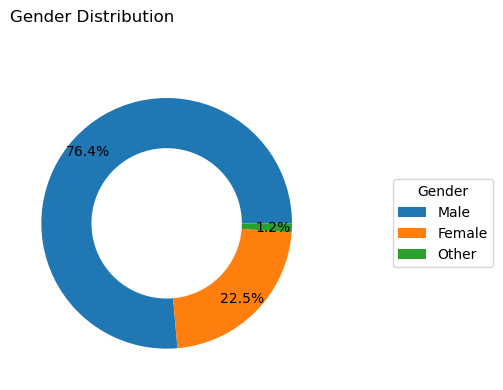

In [160]:
import matplotlib.pyplot as plt

# Data
labels = ['Male', 'Female', 'Other']
sizes = [850, 250, 13]
explode = (0, 0, 0)  # No slice is exploded

# Create the donut chart
plt.figure(figsize=(10, 4))

# Plot donut chart
plt.pie(sizes, explode=explode, labels=None, autopct='%1.1f%%', pctdistance=0.85, 
        wedgeprops=dict(width=0.4))  # Adjust width to create a donut chart

# Add a left-aligned title, lowered on y-axis
plt.title('Gender Distribution', loc='left', pad=10, y=1.1, fontsize=12)  # Lower y value and specify fontsize

# Add a legend further to the right
plt.legend(labels, loc='center left', bbox_to_anchor=(1.2, 0.5), title='Gender')  # Move legend further right

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the chart
plt.show()


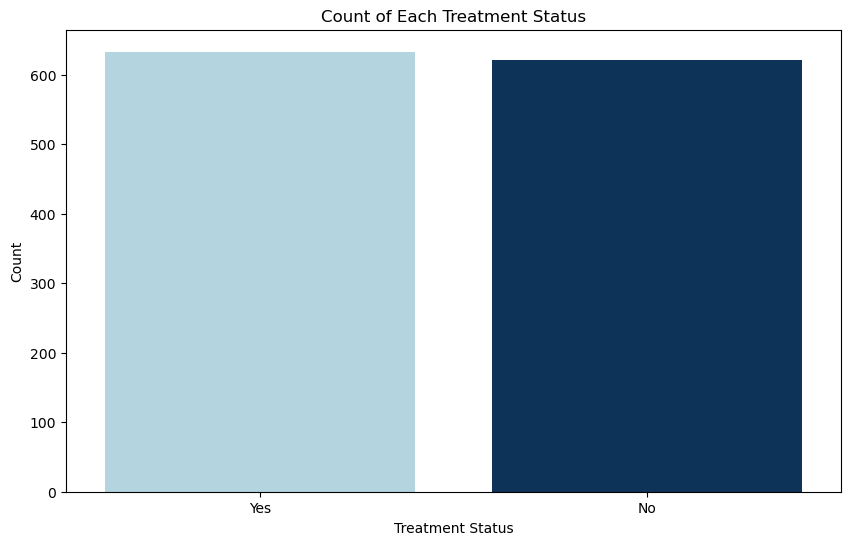

In [16]:

# Define the colors for the hues
palette = {'Yes': 'lightblue', 'No': '#003366'}  # Light blue shades

# Create a bar plot showing the count of each treatment status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='treatment', palette=palette)

# Adding titles and labels
plt.title('Count of Each Treatment Status')
plt.xlabel('Treatment Status')
plt.ylabel('Count')

# Show the plot
plt.show()


<div style="left-align: center; font-size: 15px; color: #003366; font-weight: bold; background-color: #f0f0f0; padding: 10px;">
    Inferences
</div>

The graph above shows that the target values are balanced. Balanced datasets help ensure that the model learns to predict both classes accurately. An unbalanced dataset can lead to poor performance on the minority class, as the model might be biased towards the majority class.

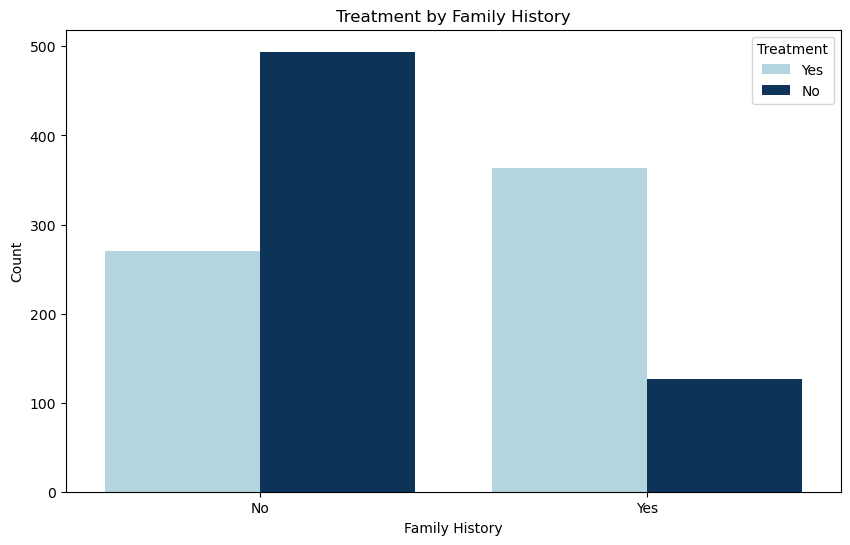

In [17]:


# Create a bar plot showing the count of each treatment status by family history
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_history', hue='treatment', palette={'Yes': 'lightblue', 'No': '#003366'})  # Light blue and a darker blue

# Adding titles and labels
plt.title('Treatment by Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')

# Show the plot
plt.show()


<div style="left-align: center; font-size: 15px; color: #003366; font-weight: bold; background-color: #f0f0f0; padding: 10px;">
    Inferences
</div>

The graph above shows that individuals with a family history of mental health disorders are highly likely to opt for treatment.

In [18]:
#Checking the occurence of unique categories in no_employees column
df['no_employees'].value_counts()

6-25              289
26-100            288
More than 1000    281
100-500           176
1-5               160
500-1000           60
Name: no_employees, dtype: int64

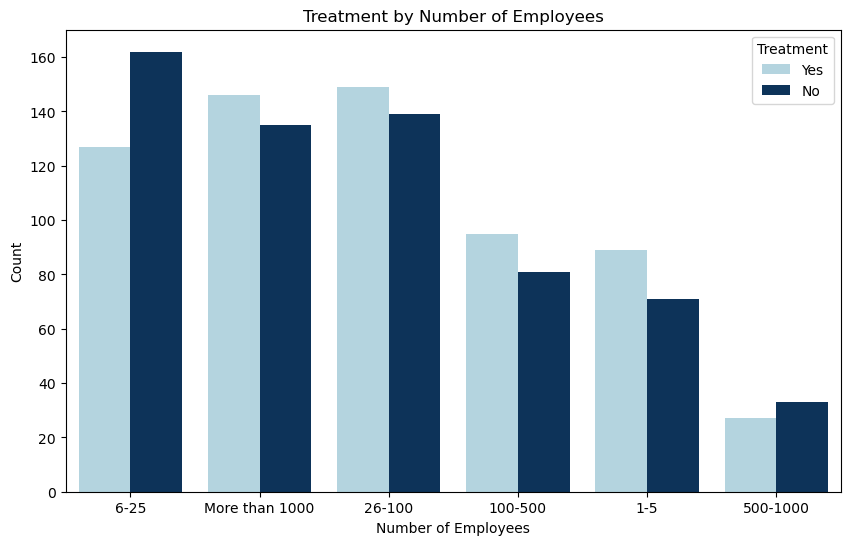

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot showing the count of each treatment status by number of employees
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_employees', hue='treatment', palette={'Yes': 'lightblue', 'No': '#003366'})  # A different shade of blue

# Adding titles and labels
plt.title('Treatment by Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')

# Show the plot
plt.show()


<div style="left-align: center; font-size: 15px; color: #003366; font-weight: bold; background-color: #f0f0f0; padding: 10px;">
    Inferences
</div>

The graph shows that there is not a significant difference in the number who seek treatment and those who don't, indicating there is no relationship between numbers of employees and treatment-seeking behaviour.

In [20]:
#Split features and target
X=df.drop(columns=['treatment'], axis=1)
y=df['treatment']

In [21]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(X, drop_first=True)

In [22]:
df_encoded.head()

,Age,Gender_Male,Gender_Other,self_employed_Yes,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,44,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,32,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,1,0,0
3,31,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,31,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=0)

<div style="left-align: center; font-size: 20px; color: #003366; font-weight: bold; background-color: #e0f7fa; padding: 10px;">
    Training and Evaluting Models before hyperparameter Tuning
</div>


In [24]:
# Initialize models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=10)
lr = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)

In [25]:
# Train models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(probability=True)

In [26]:
# Evaluate models
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)

In [27]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

Decision Tree Accuracy: 0.7250996015936255
Random Forest Accuracy: 0.7609561752988048
Logistic Regression Accuracy: 0.8007968127490039
SVC Accuracy: 0.6414342629482072


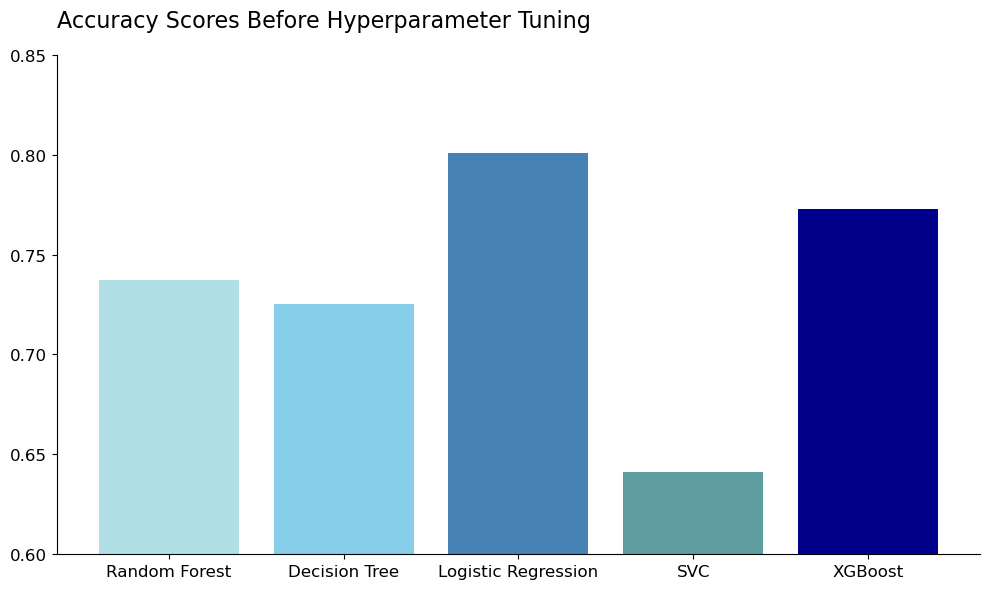

In [87]:
import matplotlib.pyplot as plt

# Accuracy results before hyperparameter tuning
model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVC', 'XGBoost']
accuracy_scores = [0.7371, 0.7251, 0.8008, 0.6414, 0.7729]  # Rounded for readability

# Same shades of blue
colors = ['#B0E0E6', '#87CEEB', '#4682B4', '#5F9EA0', '#00008B']  # Light to dark blue

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors)

# Adding titles and labels
plt.title('Accuracy Scores Before Hyperparameter Tuning', loc='left', fontsize=16, pad=20)
plt.ylim(0.6, 0.85)  # Adjusting the y-axis for consistency with the previous plot

# Increase size of the model names and numbers on y-axis
plt.xticks(fontsize=12)  # Increase fontsize
plt.yticks(fontsize=12)  # Increase fontsize

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove x and y labels
plt.xlabel('')
plt.ylabel('')

# Show plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [29]:

# Decision Tree metrics
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
y_prob_dt = dt.predict_proba(X_test)[:, 1]
auc_roc_dt = roc_auc_score(y_test, y_prob_dt)

print("Decision Tree Metrics:")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-Score: {f1_dt}")
print(f"AUC-ROC: {auc_roc_dt}\n")

# Random Forest metrics
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
y_prob_rf = rf.predict_proba(X_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Metrics:")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")
print(f"AUC-ROC: {auc_roc_rf}\n")

# Logistic Regression metrics
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
y_prob_lr = lr.predict_proba(X_test)[:, 1]
auc_roc_lr = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Metrics:")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-Score: {f1_lr}")
print(f"AUC-ROC: {auc_roc_lr}\n")

# SVC metrics (Note: SVC doesn't use predict_proba but decision_function)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
y_prob_svc = svc.decision_function(X_test)
auc_roc_svc = roc_auc_score(y_test, y_prob_svc)

print("SVC Metrics:")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1-Score: {f1_svc}")
print(f"AUC-ROC: {auc_roc_svc}")


Decision Tree Metrics:
Precision: 0.7251400746221462
Recall: 0.7250996015936255
F1-Score: 0.7251083290059913
AUC-ROC: 0.7251079502159005

Random Forest Metrics:
Precision: 0.7622020195256661
Recall: 0.7609561752988048
F1-Score: 0.7608043436012051
AUC-ROC: 0.8333121666243333

Logistic Regression Metrics:
Precision: 0.8099435394361493
Recall: 0.8007968127490039
F1-Score: 0.7990403398589814
AUC-ROC: 0.8632842265684532

SVC Metrics:
Precision: 0.6419631075190655
Recall: 0.6414342629482072
F1-Score: 0.641331802583924
AUC-ROC: 0.7320294640589281


<div style="left-align: center; font-size: 15px; color: #003366; font-weight: bold; background-color: #f0f0f0; padding: 10px;">
    Inferences
</div>

Based on the results, Logistic Regression accurately predicted 80% of the target values using default parameters. 

In [30]:
# Metrics for each model (example values)
metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
dt_metrics = [precision_dt, recall_dt, f1_dt, auc_roc_dt]
rf_metrics = [precision_rf, recall_rf, f1_rf, auc_roc_rf]
lr_metrics = [precision_lr, recall_lr, f1_lr, auc_roc_lr]
svc_metrics = [precision_svc, recall_svc, f1_svc, auc_roc_svc]

# Colors for each model
colors_dt = ['#B0E0E6', '#ADD8E6', '#87CEEB', '#4682B4']  # Shades of blue
colors_rf = ['#E6E6FA', '#D8BFD8', '#DDA0DD', '#BA55D3']  # Light to dark purple  # Shades of orange
colors_lr = ['#98FB98', '#00FF7F', '#32CD32', '#228B22']  # Shades of green
colors_svc = ['#FFC0CB', '#FF69B4', '#FF1493', '#C71585']  # Shades of pink

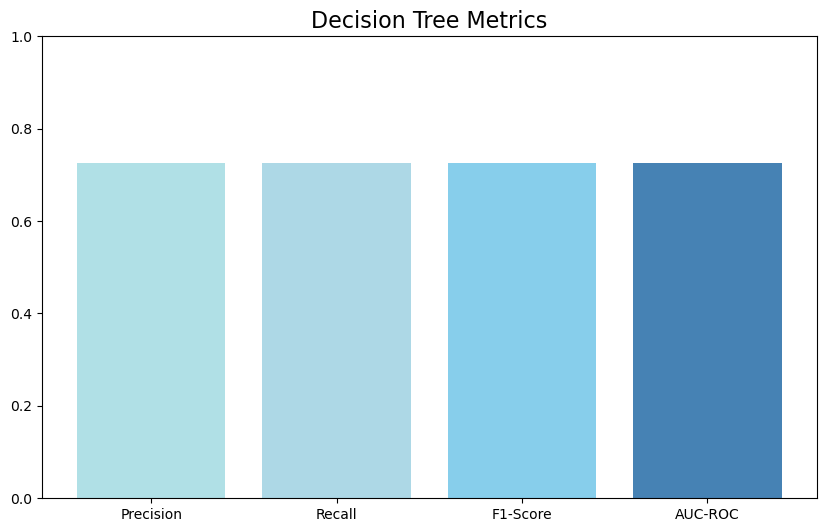

In [31]:
# Plotting for Decision Tree
plt.figure(figsize=(10, 6))
plt.bar(metrics, dt_metrics, color=colors_dt)
plt.title('Decision Tree Metrics', fontsize=16)
plt.ylim(0, 1)
plt.show()

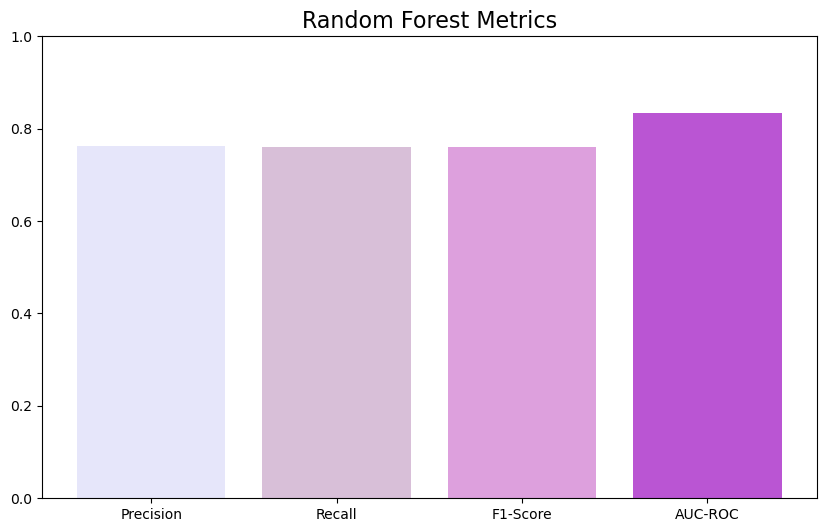

In [32]:
# Plotting for Random Forest
plt.figure(figsize=(10, 6))
plt.bar(metrics, rf_metrics, color=colors_rf)
plt.title('Random Forest Metrics', fontsize=16)
plt.ylim(0, 1)
plt.show()

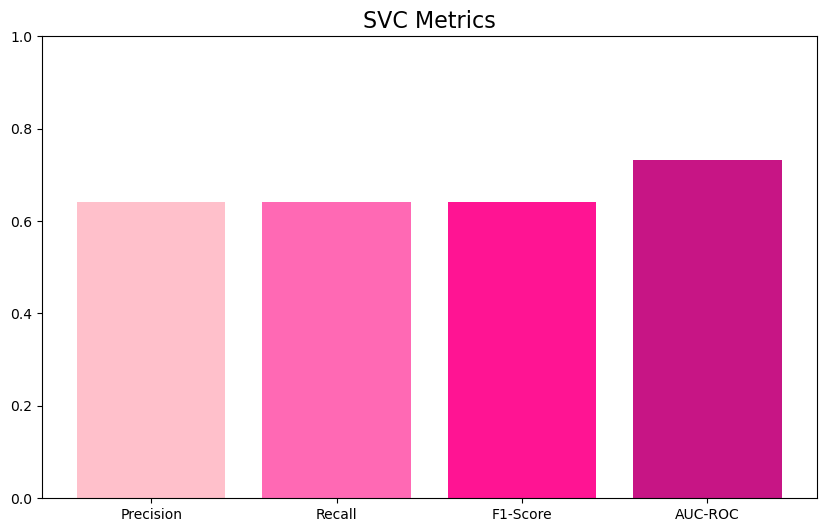

In [33]:
# Plotting for SVC
plt.figure(figsize=(10, 6))
plt.bar(metrics, svc_metrics, color=colors_svc)
plt.title('SVC Metrics', fontsize=16)
plt.ylim(0, 1)
plt.show()

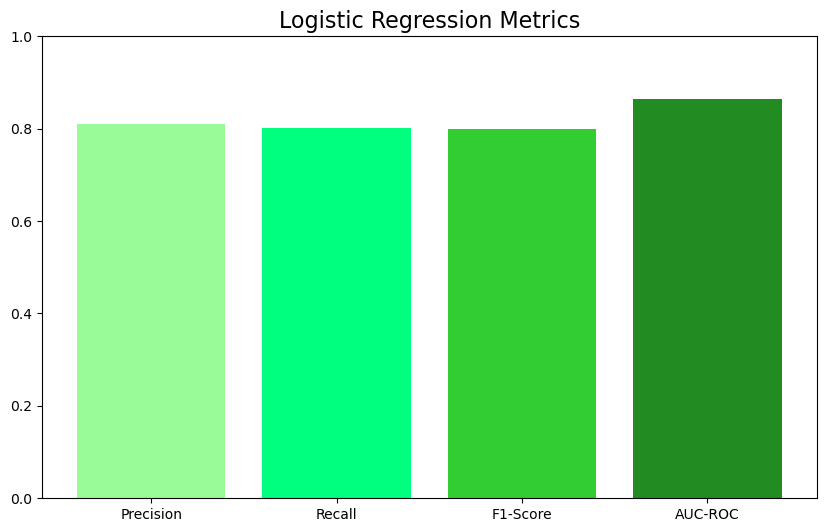

In [34]:
# Plotting for Logistic Regression
plt.figure(figsize=(10, 6))
plt.bar(metrics, lr_metrics, color=colors_lr)
plt.title('Logistic Regression Metrics', fontsize=16)
plt.ylim(0, 1)
plt.show()

<div style="left-align: center; font-size: 20px; color: #003366; font-weight: bold; background-color: #e0f7fa; padding: 10px;">
    Evaluating the models after Hyperparameter tuning
</div>

***GridSearchCV*** was applied to the models to find the best parameters to make predictions.


In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 5],          # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for best split
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Random Forest Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score:  0.8354875621890546
Random Forest Accuracy with Best Parameters: 0.7928286852589641


In [27]:

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

# Evaluate on the test set
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print("Decision Tree Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_dt))

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 15}
Best cross-validation score:  0.8005771144278608
Decision Tree Accuracy with Best Parameters: 0.7569721115537849


In [28]:

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100],
    'penalty': ['l2','none'],
    'max_iter': [300, 500, 1000],
    'class_weight': [None, 'balanced']
}

# Initialize the LogisticRegression
lr = LogisticRegression()

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

# Evaluate on the test set
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)
print("Logistic Regression Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_lr))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found:  {'C': 1, 'class_weight': None, 'max_iter': 300, 'penalty': 'l2'}
Best cross-validation score:  0.8275572139303481
Logistic Regression Accuracy with Best Parameters: 0.8007968127490039


In [29]:
# Define the parameter grid
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Only for 'poly' kernel
    'gamma': ['scale', 'auto'],  # Only for 'rbf', 'poly', and 'sigmoid'
    'coef0': [0.0, 0.5, 1.0],  # Only for 'poly' and 'sigmoid'
}

# Initialize the SVC
svc = SVC(probability=True)

# Setup GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, verbose=2, error_score='raise')

# Fit the GridSearchCV
grid_search_svc.fit(X_train, y_train)

# Get the best parameters and score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print("Best parameters for SVC found: ", best_params_svc)
print("Best cross-validation score for SVC: ", best_score_svc)

# Evaluate on the test set
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)

print("SVC Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_svc))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters for SVC found:  {'C': 10, 'coef0': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation score for SVC:  0.8424875621890549
SVC Accuracy with Best Parameters: 0.8007968127490039


In [30]:
# Precision, Recall, F1 Score
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1 Score:", f1_lr)

print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1 Score:", f1_dt)

print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

print("SVC Precision:", precision_svc)
print("SVC Recall:", recall_svc)
print("SVC F1 Score:", f1_svc)


Logistic Regression Precision: 0.8099435394361493
Logistic Regression Recall: 0.8007968127490039
Logistic Regression F1 Score: 0.7990403398589814
Decision Tree Precision: 0.7572650574173893
Decision Tree Recall: 0.7569721115537849
Decision Tree F1 Score: 0.75681765367467
Random Forest Precision: 0.803504920714493
Random Forest Recall: 0.7928286852589641
Random Forest F1 Score: 0.7906728686487349
SVC Precision: 0.8272242874569763
SVC Recall: 0.8007968127490039
SVC F1 Score: 0.7962476703465902


In [32]:
# Predict probabilities using the fitted models from GridSearchCV
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_prob_svc = best_svc.predict_proba(X_test)[:, 1] 

# AUC-ROC
auc_roc_lr = roc_auc_score(y_test, y_prob_lr)
auc_roc_svc = roc_auc_score(y_test, y_prob_svc)

# DecisionTree and RandomForest need probabilities as well
y_prob_dt = best_dt.predict_proba(X_test)[:, 1] 
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

auc_roc_dt = roc_auc_score(y_test, y_prob_dt)
auc_roc_rf = roc_auc_score(y_test, y_prob_rf)

# Print AUC-ROC scores
print("Logistic Regression AUC-ROC:", auc_roc_lr)
print("SVC AUC-ROC:", auc_roc_svc)
print("Decision Tree AUC-ROC:", auc_roc_dt)
print("Random Forest AUC-ROC:", auc_roc_rf)


Logistic Regression AUC-ROC: 0.8632207264414529
SVC AUC-ROC: 0.8492189484378968
Decision Tree AUC-ROC: 0.7968313436626873
Random Forest AUC-ROC: 0.8638557277114555


In [34]:
import xgboost as xgb


# Assuming you already have X_train, X_test, y_train, and y_test

# Transform the target variable into binary format
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Train XGBoost model
xgb_model.fit(X_train, y_train_binary)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test_binary, y_pred_xgb))

precision_xgb = precision_score(y_test_binary, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_binary, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_binary, y_pred_xgb, average='weighted')

print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1 Score:", f1_xgb)

# Predict probabilities for AUC-ROC
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# AUC-ROC score
auc_roc_xgb = roc_auc_score(y_test_binary, y_prob_xgb)
print("XGBoost AUC-ROC:", auc_roc_xgb)


XGBoost Accuracy: 0.7729083665338645
XGBoost Precision: 0.7776513365023809
XGBoost Recall: 0.7729083665338645
XGBoost F1 Score: 0.7716749811985106
XGBoost AUC-ROC: 0.8388366776733553


In [35]:


# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of boosting rounds
    'max_depth': [3, 6, 10, 15],           # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],          # Fraction of samples used for fitting each base learner
    'colsample_bytree': [0.8, 0.9, 1.0],   # Fraction of features used for each base learner
    'gamma': [0, 0.1, 0.2, 0.3],           # Minimum loss reduction required to make a further partition
    'scale_pos_weight': [1, 2, 5],          # Control the balance of positive and negative weights
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_binary)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Predict on test set using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the best XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test_binary, y_pred_xgb))

precision_xgb = precision_score(y_test_binary, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_binary, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_binary, y_pred_xgb, average='weighted')

print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1 Score:", f1_xgb)

# Predict probabilities for AUC-ROC
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# AUC-ROC score
auc_roc_xgb = roc_auc_score(y_test_binary, y_prob_xgb)
print("XGBoost AUC-ROC:", auc_roc_xgb)


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 1.0}
Best cross-validation score:  0.8968826353223557
XGBoost Accuracy: 0.8087649402390438
XGBoost Precision: 0.8181827237700074
XGBoost Recall: 0.8087649402390438
XGBoost F1 Score: 0.8070787262646221
XGBoost AUC-ROC: 0.8516637033274066


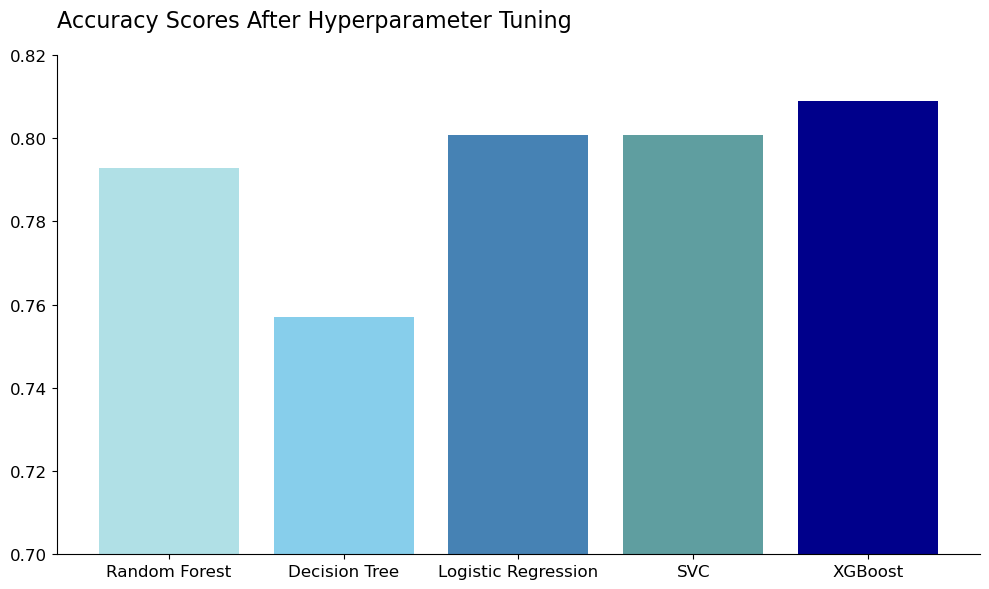

In [134]:
import matplotlib.pyplot as plt

# Accuracy results after hyperparameter tuning
model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVC', 'XGBoost']
accuracy_scores = [0.7928, 0.7570, 0.8008, 0.8008, 0.8088]  # Rounded for readability

# Different shades of blue
colors = ['#B0E0E6', '#87CEEB', '#4682B4', '#5F9EA0', '#00008B']  # Light to dark blue

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors)

# Adding titles and labels
plt.ylim(0.7, 0.82)  # Adjusting the y-axis to end at 0.82

# Increase size of the model names and numbers on y-axis
plt.xticks(fontsize=12)  # Increase fontsize
plt.yticks(fontsize=12)  # Increase fontsize

# Add a left-aligned bold title with extra space
plt.title('Accuracy Scores After Hyperparameter Tuning', loc='left', fontsize=16, pad=20)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


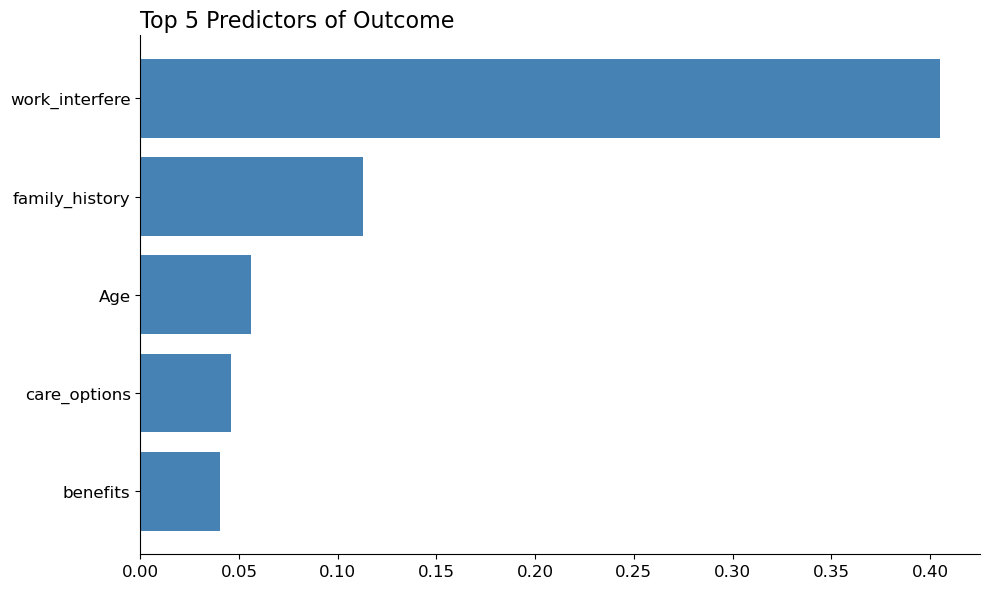

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Example data
# Replace these lines with your actual data
# feature_importances = best_rf.feature_importances_
# X_train = pd.DataFrame(...)  # Your DataFrame with feature names

# Create a DataFrame for better visualization
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Use regular expressions to remove suffixes added to one-hot encoded columns (after underscores)
features['Base Feature'] = features['Feature'].apply(lambda x: re.split(r'_\d+|_[A-Za-z]+$', x)[0])

# Group by base feature and sum the importance values
features_grouped = features.groupby('Base Feature').sum().sort_values(by='Importance', ascending=False)

# Plot the top 5 most important base features
plt.figure(figsize=(10, 6))
plt.barh(features_grouped.index[:5], features_grouped['Importance'][:5], color='#4682B4')  # Using a single color

# Adding title and formatting
plt.title('Top 5 Predictors of Outcome', loc='left', fontsize=16)
plt.gca().invert_yaxis()  # To display the most important features at the top

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(fontsize=12)  # Increase fontsize
plt.yticks(fontsize=12)  # Increase fontsize

# Show plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


<div style="left-align: center; font-size: 20px; color: #003366; font-weight: bold; background-color: #e0f7fa; padding: 10px;">
    Conclusion
</div>


<div style="left-align: center; font-size: 15px; color: #003366; font-weight: bold; background-color: #f0f0f0; padding: 10px;">
    Best Performing Model
</div>

**Random Forest** is the best performing model overall based on the following considerations:

- **Accuracy**: Highest among the models (0.79).
- **Precision**: Highest precision (0.80), which indicates fewer false positives.
- **Recall**: Highest recall (0.792), which means it captures the most positive cases.
- **F1 Score**: Slightly lower than Logistic Regression but still competitive (0.79).
- **AUC-ROC**: Highest AUC-ROC score (0.863), showing the best ability to distinguish between classes.


<div style="left-align: center; font-size: 15px; color: #003366; font-weight: bold; background-color: #f0f0f0; padding: 10px;">
    Insights
</div>

- **Logistic Regression** showed minimal improvement after hyperparameter tuning and remains one of the less effective models compared to others in this case.
  
- **SVC** demonstrated a significant improvement post-tuning but does not outperform Random Forest or Logistic Regression in overall metrics.
  
- **XGBoost** performed slightly better than Random Forest in accuracy and precision but had a lower AUC-ROC score compared to Random Forest.



<div style="left-align: center; font-size: 15px; color: #003366; font-weight: bold; background-color: #f0f0f0; padding: 10px;">
    Recommendations
</div>

Based on the evaluation metrics, Random Forest is recommended as the best model for this task due to its balance across all metrics and highest AUC-ROC score. It effectively handles both precision and recall, making it a robust choice for this application.

In conclusion, while all models have their strengths, the Random Forest model’s overall performance, particularly in distinguishing between classes, makes it the most suitable choice for deployment in this case.


---

<div style="text-align: center;">
    <h3>🧠 Thank you for exploring the Mental Health Prediction Project! 🧠</h3>
</div>

---
